<a href="https://colab.research.google.com/github/RohanRaghav/Student_performance/blob/main/Student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load your CSV file (update the filename)
data = pd.read_csv('/content/Project - Form Responses 1.csv')

# Preview the data
print(data.head())

            Timestamp  CGPA Part of any club or society  \
0  2/15/2025 14:15:46   9.0                        Both   
1  2/15/2025 14:19:35   8.8                         NaN   
2  2/15/2025 14:20:57   7.4                        Club   
3  2/15/2025 14:23:02   6.2                        Both   
4  2/15/2025 14:27:13   6.6                     Society   

  Position in club or society              Sports Any internship yet  \
0                    Director   Plays indoor game                 No   
1                  Not a part  Plays outdoor game             online   
2                   Executive  Plays outdoor game            offline   
3             Student advisor  Plays outdoor game    offline, online   
4                   Treasurer                 NaN            offline   

   How many Competitions participated? (0 if none) Participated in hackathon?  \
0                                                1                        Yes   
1                                                0

In [4]:
# Encoding "Part of any club or society"
data['Part of any club or society'] = data['Part of any club or society'].map({
    'None': 0, 'Club': 1, 'Society': 2, 'Both': 3
})

# Encoding "Position in club or society" using ordinal mapping
position_mapping = {
    'Not a part': 0, 'Intern': 1, 'Co-executive': 2, 'Executive': 3, 'Director': 4,
    'Treasurer': 5, 'Joint-secretary': 6, 'Secretary': 7, 'Student advisor': 8
}
data['Position in club or society'] = data['Position in club or society'].map(position_mapping)

# Encoding "Sports"
data['Sports'] = data['Sports'].map({
    'None': 0, 'Plays outdoor game': 1, 'Plays indoor game': 2
})

# Encoding "Any internship yet"
data['Any internship yet'] = data['Any internship yet'].map({
    'No': 0, 'offline': 1, 'online': 2
})

# Encoding "Participated in hackathon?"
data['Participated in hackathon?'] = data['Participated in hackathon?'].map({
    'No': 0, 'Yes': 1
})
data.fillna(0, inplace=True)  # Or you can choose a different strategy
print(data.head())


            Timestamp  CGPA  Part of any club or society  \
0  2/15/2025 14:15:46   9.0                          0.0   
1  2/15/2025 14:19:35   8.8                          0.0   
2  2/15/2025 14:20:57   7.4                          0.0   
3  2/15/2025 14:23:02   6.2                          0.0   
4  2/15/2025 14:27:13   6.6                          0.0   

   Position in club or society  Sports  Any internship yet  \
0                          0.0     0.0                 0.0   
1                          0.0     0.0                 0.0   
2                          0.0     0.0                 0.0   
3                          0.0     0.0                 0.0   
4                          0.0     0.0                 0.0   

   How many Competitions participated? (0 if none)  \
0                                                1   
1                                                0   
2                                                0   
3                                               12

In [8]:
from sklearn.preprocessing import StandardScaler

# Scale the data (important for K-Means)
scaler = StandardScaler()
data = data.apply(pd.to_numeric, errors='coerce').fillna(0)

scaled_data = scaler.fit_transform(data)


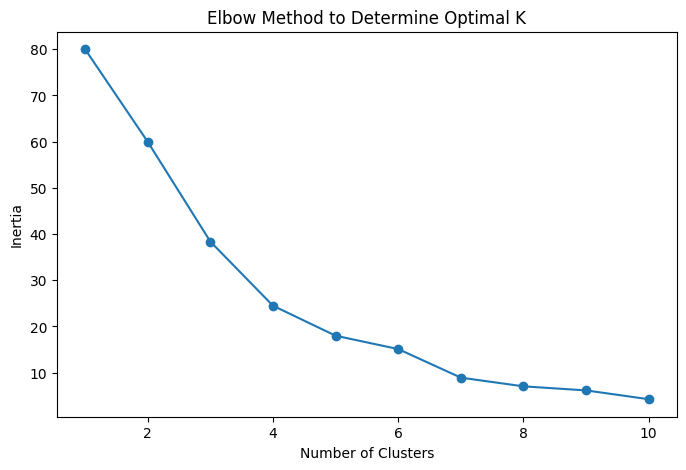

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal K')
plt.show()


In [10]:
# Assume the elbow plot suggests 3 clusters (adjust based on your plot)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

print(data[['CGPA', 'Cluster']])  # Check clusters


    CGPA  Cluster
0   9.00        1
1   8.80        1
2   7.40        1
3   6.20        2
4   6.60        0
5   8.00        1
6   7.80        1
7   7.20        0
8   6.60        0
9   7.54        1
10  4.00        0
11  8.80        1
12  6.90        1
13  8.70        1
14  9.20        1
15  5.60        0
16  7.70        1
17  8.20        1
18  6.95        0
19  8.90        1


In [11]:
# Analyze cluster characteristics
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)


         Timestamp      CGPA  Part of any club or society  \
Cluster                                                     
0              0.0  6.158333                          0.0   
1              0.0  8.226154                          0.0   
2              0.0  6.200000                          0.0   

         Position in club or society  Sports  Any internship yet  \
Cluster                                                            
0                                0.0     0.0                 0.0   
1                                0.0     0.0                 0.0   
2                                0.0     0.0                 0.0   

         How many Competitions participated? (0 if none)  \
Cluster                                                    
0                                               3.000000   
1                                               0.538462   
2                                              12.000000   

         Participated in hackathon?  \
Cluster      

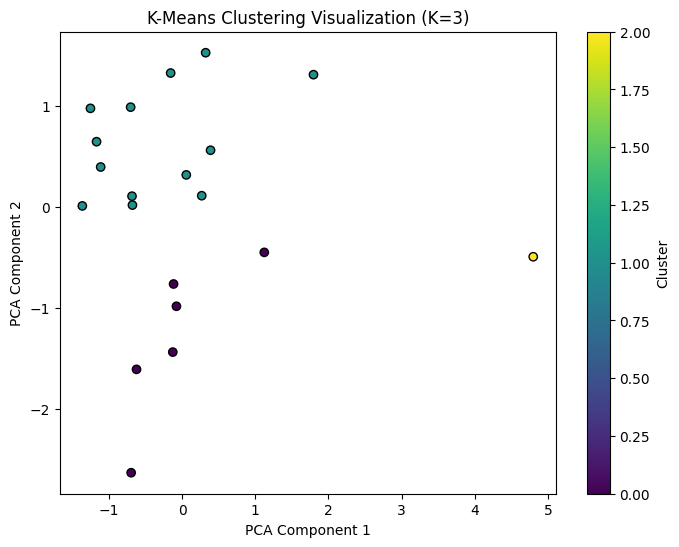

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load and preprocess your data (assuming same steps as before)
data = pd.read_csv("/content/Project - Form Responses 1.csv")
data = data.apply(pd.to_numeric, errors='coerce').fillna(0)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Choose optimal K (e.g., from elbow plot, suppose K=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)

# Reduce dimensions using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plot each data point with its cluster label
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', edgecolor='k')
plt.title(f'K-Means Clustering Visualization (K={optimal_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import joblib

# Drop Timestamp
data = data.drop(['Timestamp'], axis=1)

# Convert to numeric (in case of string values)
data = data.apply(pd.to_numeric, errors='coerce')

# Handle NaNs if any
data = data.fillna(0)  # You can also use other imputation methods if needed

# Scale
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Train
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# Save the scaler and model
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(kmeans, 'kmeans_model.pkl')


['kmeans_model.pkl']

In [20]:
import numpy as np
import joblib

# Load the saved scaler and model
scaler = joblib.load('scaler.pkl')
kmeans = joblib.load('kmeans_model.pkl')

# Collect user input
cgpa = float(input("Enter CGPA: "))
club_society = int(input("Enter Club/Society (0-None, 1-Club, 2-Society, 3-Both): "))
position = int(input("Enter Position (0-Not a part, 1-Intern, 2-Co-executive, 3-Executive, 4-Director, 5-Treasurer, 6-Joint-secretary, 7-Secretary, 8-Student advisor): "))
sports = int(input("Enter Sports (0-None, 1-Plays outdoor game, 2-Plays indoor game): "))
internship = int(input("Enter Internship (0-No, 1-Online, 2-Offline): "))
competitions = int(input("Enter Number of Competitions Participated: "))
hackathon_participation = int(input("Participated in Hackathon? (0-No, 1-Yes): "))
online_hackathons = int(input("Number of Online Hackathons Participated: "))
offline_hackathons = int(input("Number of Offline Hackathons Participated: "))

# Create numpy array with user input in the same feature order as training data
user_data = np.array([[cgpa, club_society, position, sports, internship, competitions, hackathon_participation, online_hackathons, offline_hackathons]])

# Scale the user data
scaled_user_data = scaler.transform(user_data)

# Predict cluster
cluster = kmeans.predict(scaled_user_data)[0]

# Personalized performance feedback based on cluster
if cluster == 0:
    feedback = """
    You are performing at an average level. Here are some areas where you can improve:
    - Try participating in more technical competitions or hackathons.
    - Consider joining a club or society and taking an active role.
    - Gaining internship experience can enhance your practical skills.
    """
elif cluster == 1:
    feedback = """
    Excellent work! You are doing very well.
    - You seem to be actively involved in academics and extracurriculars.
    - Keep up the good work and consider mentoring others or leading bigger initiatives.
    """
elif cluster == 2:
    feedback = """
    You need some improvement. Consider focusing on the following areas:
    - Boost your participation in competitions and hackathons.
    - Engage in a club or society to develop leadership and teamwork skills.
    - Look for internship opportunities to gain practical industry experience.
    """

print(f"\nPredicted Cluster: {cluster}")
print(f"Performance Feedback: {feedback.strip()}")


Enter CGPA: 8
Enter Club/Society (0-None, 1-Club, 2-Society, 3-Both): 3
Enter Position (0-Not a part, 1-Intern, 2-Co-executive, 3-Executive, 4-Director, 5-Treasurer, 6-Joint-secretary, 7-Secretary, 8-Student advisor): 1
Enter Sports (0-None, 1-Plays outdoor game, 2-Plays indoor game): 0
Enter Internship (0-No, 1-Online, 2-Offline): 0
Enter Number of Competitions Participated: 0
Participated in Hackathon? (0-No, 1-Yes): 1
Number of Online Hackathons Participated: 1
Number of Offline Hackathons Participated: 0

Predicted Cluster: 1
Performance Feedback: Excellent work! You are doing very well.
    - You seem to be actively involved in academics and extracurriculars.
    - Keep up the good work and consider mentoring others or leading bigger initiatives.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
